# Exercises week 39

## Getting started with project 1


The aim of the exercises this week is to aid you in getting started with writing the report. This will be discussed during the lab sessions as well.

A short feedback to the this exercise will be available before the project deadline. And you can reuse these elements in your final report.


### Learning goals

After completing these exercises, you will know how to

- Create a properly formatted report in Overleaf
- Select and present graphs for a scientific report
- Write an abstract and introduction for a scientific report

### Deliverables

Complete the following exercises while working in an Overleaf project. Then, in canvas, include

- An exported PDF of the report draft you have been working on.
- A comment linking to the github repository used in exercise 4.


## Exercise 1: Creating the report document


We require all projects to be formatted as proper scientific reports, and this includes using LaTeX for typesetting. We strongly recommend that you use the online LaTeX editor Overleaf, as it is much easier to start using, and has excellent support for collaboration.

**a)** Create an account on Overleaf.com, or log in using SSO with your UiO email.

**b)** Download [this](https://github.com/CompPhysics/MachineLearning/blob/master/doc/LectureNotes/data/FYS_STK_Template.zip) template project.

**c)** Create a new Overleaf project with the correct formatting by uploading the template project.

**d)** Read the general guideline for writing a report, which can be found at <https://github.com/CompPhysics/MachineLearning/blob/master/doc/Projects/EvaluationGrading/EvaluationForm.md>.

**e)** Look at the provided example of an earlier project, found at <https://github.com/CompPhysics/MachineLearning/blob/master/doc/Projects/ReportExample/ReportExampleDanielBH.pdf>


## Exercise 2: Adding good figures


**a)** Using what you have learned so far in this course, create a plot illustrating the Bias-Variance trade-off. Make sure the lines and axes are labeled, with font size being the same as in the text.

**b)** Add this figure to the results section of your document, with a caption that describes it. A reader should be able to understand the figure with only its contents and caption.

**c)** Refer to the figure in your text using \ref.

**d)** Create a heatmap showing the MSE of a Ridge regression model for various polynomial degrees and lambda values. Make sure the axes are labeled, and that the title or colorbar describes what is plotted.

**e)** Add this second figure to your document with a caption and reference in the text. All figures in the final report must be captioned and be referenced and used in the text.


Polynomial degree: 0
Error: 0.3214960170351912
Bias^2: 0.3123314713548606
Var: 0.009164545680330616
0.321496 >= 0.312331 + 0.009165 = 0.321496

Polynomial degree: 1
Error: 0.08426840630693411
Bias^2: 0.0796891867672603
Var: 0.004579219539673833
0.084268 >= 0.079689 + 0.004579 = 0.084268

Polynomial degree: 2
Error: 0.10398646080125032
Bias^2: 0.10077114273548984
Var: 0.003215318065760509
0.103986 >= 0.100771 + 0.003215 = 0.103986

Polynomial degree: 3
Error: 0.06547790180152355
Bias^2: 0.06208238634231946
Var: 0.003395515459204095
0.065478 >= 0.062082 + 0.003396 = 0.065478

Polynomial degree: 4
Error: 0.06844519414009442
Bias^2: 0.0645357900672832
Var: 0.003909404072811212
0.068445 >= 0.064536 + 0.003909 = 0.068445

Polynomial degree: 5
Error: 0.05227921801205696
Bias^2: 0.04818727730430301
Var: 0.004091940707753966
0.052279 >= 0.048187 + 0.004092 = 0.052279

Polynomial degree: 6
Error: 0.03781367141738884
Bias^2: 0.03365768507152754
Var: 0.004155986345861311
0.037814 >= 0.033658 + 0.0

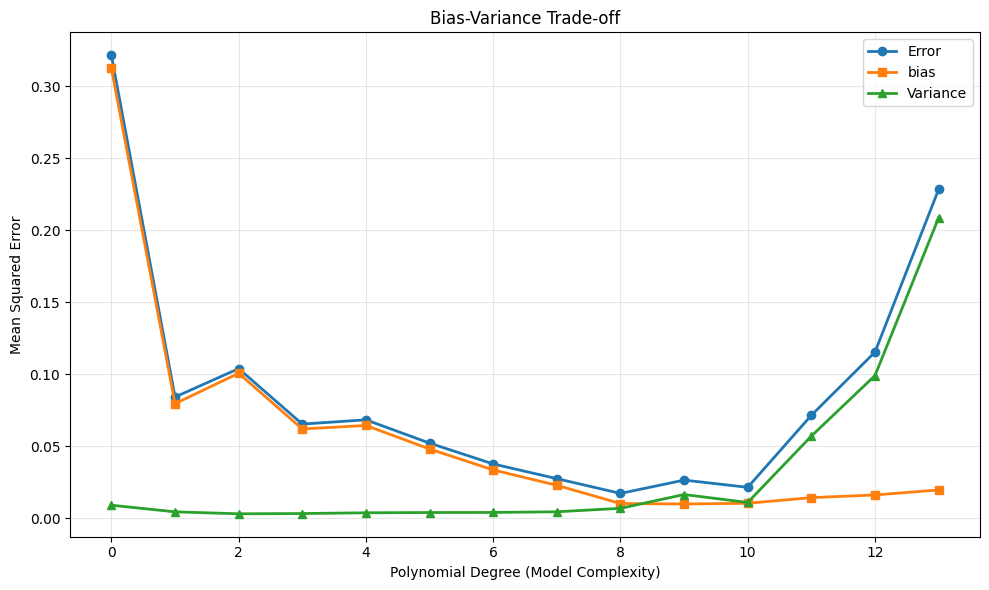

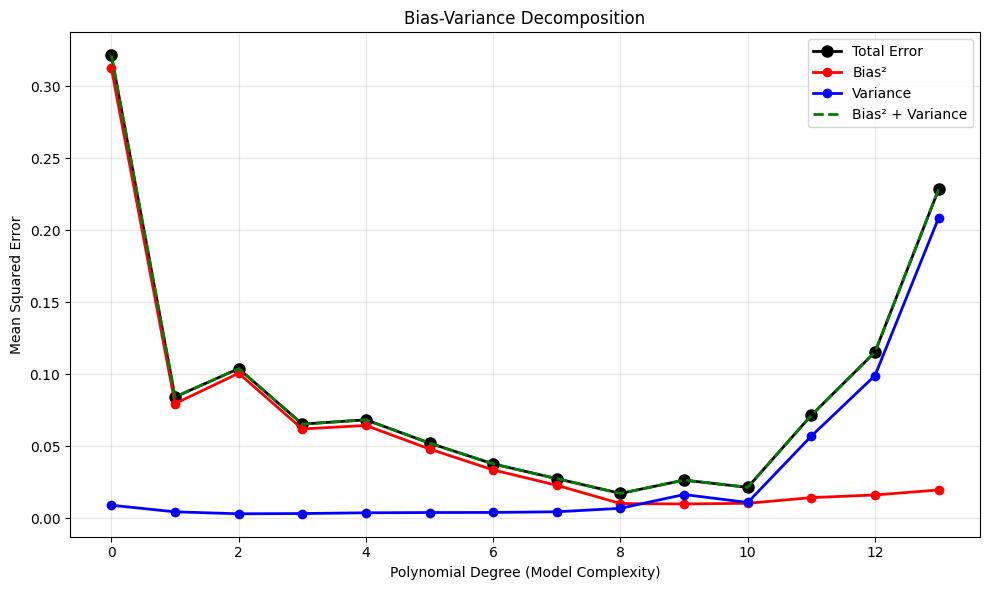

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.utils import resample

# Set random seed for reproducibility
np.random.seed(2018)

# Parameters from course material
n = 40                    # Number of data points
n_bootstraps = 100        # Number of bootstrap samples
maxdegree = 14           # Maximum polynomial degree to test
noise = 0.1              # Noise level

# Generate data using the same function as in course examples
# Two Gaussian peaks as used in the course material
x = np.linspace(-3, 3, n).reshape(-1, 1)
y = np.exp(-x**2) + 1.5 * np.exp(-(x-2)**2) + np.random.normal(0, noise, x.shape)

# Initialize arrays to store results
error = np.zeros(maxdegree)
bias = np.zeros(maxdegree)
variance = np.zeros(maxdegree)
polydegree = np.zeros(maxdegree)

# Hold out some test data that is never used in training
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

# Loop over polynomial degrees (model complexity)
for degree in range(maxdegree):
    # Create pipeline combining polynomial features and linear regression
    model = make_pipeline(PolynomialFeatures(degree=degree), 
                         LinearRegression(fit_intercept=False))
    
    # Matrix to hold predictions from each bootstrap iteration
    y_pred = np.empty((y_test.shape[0], n_bootstraps))
    
    # Perform bootstrap resampling
    for i in range(n_bootstraps):
        # Resample training data with replacement
        x_, y_ = resample(x_train, y_train)
        
        # Train model on resampled data and predict on same test set
        y_pred[:, i] = model.fit(x_, y_).predict(x_test).ravel()

    # Store polynomial degree
    polydegree[degree] = degree
    
    # Calculate bias, variance, and error as in course material
    # Note: keepdims=True is important for correct calculation as mentioned in course
    error[degree] = np.mean(np.mean((y_test - y_pred)**2, axis=1, keepdims=True))
    bias[degree] = np.mean((y_test - np.mean(y_pred, axis=1, keepdims=True))**2)
    variance[degree] = np.mean(np.var(y_pred, axis=1, keepdims=True))
    
    # Print results for verification (as shown in course material)
    print('Polynomial degree:', degree)
    print('Error:', error[degree])
    print('Bias^2:', bias[degree])
    print('Var:', variance[degree])
    print('{:.6f} >= {:.6f} + {:.6f} = {:.6f}'.format(
        error[degree], bias[degree], variance[degree], bias[degree]+variance[degree]))
    print()

# Create the bias-variance trade-off plot following course example
plt.figure(figsize=(10, 6))
plt.plot(polydegree, error, 'o-', label='Error', linewidth=2, markersize=6)
plt.plot(polydegree, bias, 's-', label='bias', linewidth=2, markersize=6)
plt.plot(polydegree, variance, '^-', label='Variance', linewidth=2, markersize=6)

# Add labels and formatting
plt.xlabel('Polynomial Degree (Model Complexity)')
plt.ylabel('Mean Squared Error')
plt.title('Bias-Variance Trade-off')
plt.legend()
plt.grid(True, alpha=0.3)

# Add some styling to match academic presentation
plt.tight_layout()
plt.show()

# Additional plot: Show the decomposition more clearly
plt.figure(figsize=(10, 6))
plt.plot(polydegree, error, 'ko-', label='Total Error', linewidth=2, markersize=8)
plt.plot(polydegree, bias, 'ro-', label='Bias²', linewidth=2, markersize=6)
plt.plot(polydegree, variance, 'bo-', label='Variance', linewidth=2, markersize=6)
plt.plot(polydegree, bias + variance, 'g--', label='Bias² + Variance', linewidth=2)

plt.xlabel('Polynomial Degree (Model Complexity)')
plt.ylabel('Mean Squared Error')
plt.title('Bias-Variance Decomposition')
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

Computing Ridge regression MSE for different polynomial degrees and lambda values...
Progress: Degree 1 Degree 3 Degree 5 Degree 7 Degree 9 Degree 11 Degree 13 Degree 15 
Completed!


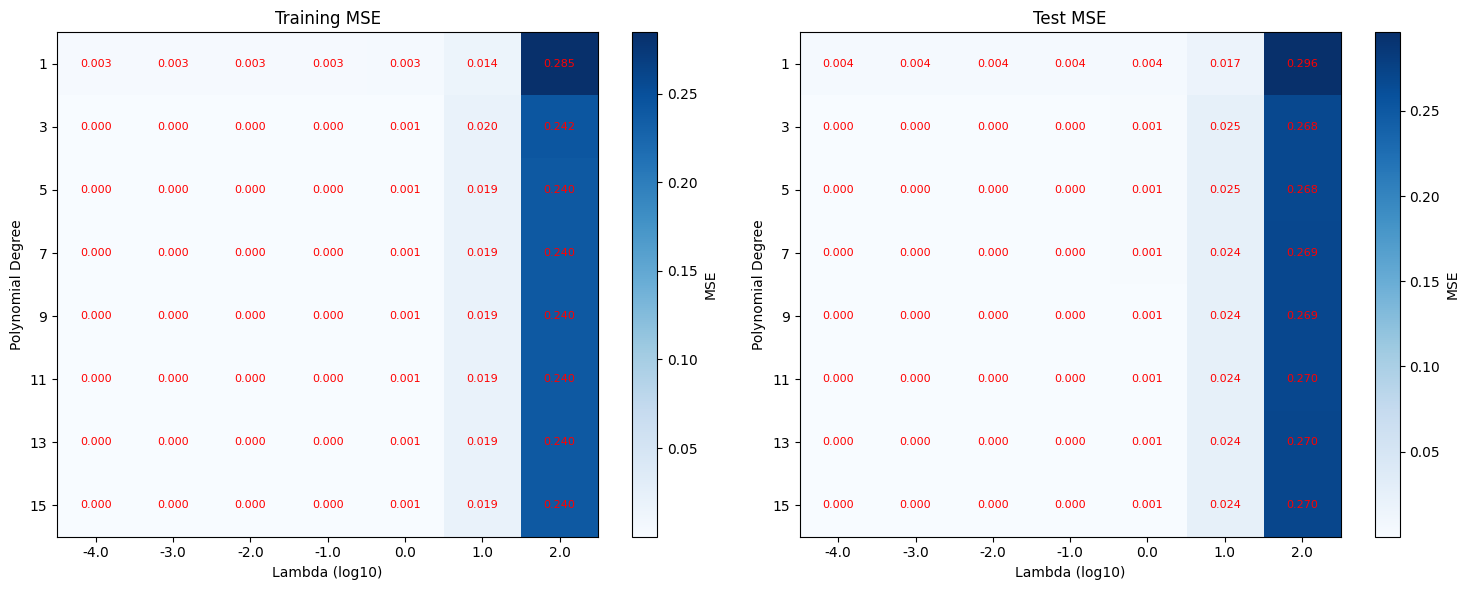


Key Findings:
Minimum Training MSE: 0.000000 at degree 7, λ = 1.00e-04
Minimum Test MSE: 0.000000 at degree 7, λ = 1.00e-04

Interpretation:
- Darker blue regions indicate higher MSE (worse performance)
- Lighter regions indicate lower MSE (better performance)
- Compare training vs test MSE to identify overfitting patterns
- Large differences between training and test MSE suggest overfitting


In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import Ridge
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline

# Set random seed for reproducibility (same as course material)
np.random.seed(3155)

# Parameters from course material
n = 100
degrees = [1, 3, 5, 7, 9, 11, 13, 15]  # Polynomial degrees to test
Lambdas = np.logspace(-4, 2, 7)  # Lambda values from 10^-4 to 10^2

# Generate data using the same function as in course examples
# Double Gaussian peaks as used in the course material
x = np.random.rand(n)
y = np.exp(-x**2) + 1.5 * np.exp(-(x-2)**2)

# Create full design matrix up to maximum degree
max_degree = max(degrees)
X_full = np.zeros((n, max_degree))
for degree in range(max_degree):
    X_full[:, degree] = x**degree

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_full, y, test_size=0.2, random_state=42)

# Define MSE function as used in course material
def MSE(y_data, y_model):
    n = np.size(y_model)
    return np.sum((y_data - y_model)**2) / n

# Initialize MSE matrices for training and test data
MSE_heatmap_train = np.zeros((len(degrees), len(Lambdas)))
MSE_heatmap_test = np.zeros((len(degrees), len(Lambdas)))

print("Computing Ridge regression MSE for different polynomial degrees and lambda values...")
print("Progress: ", end="")

# Loop over polynomial degrees and lambda values
for i, degree in enumerate(degrees):
    # Print progress indicator
    print(f"Degree {degree}", end=" ")
    
    # Create design matrix for current polynomial degree
    X_train_poly = X_train[:, :degree]
    X_test_poly = X_test[:, :degree]
    
    for j, lmb in enumerate(Lambdas):
        # Fit Ridge regression model (following course approach with fit_intercept=False)
        ridge_model = Ridge(alpha=lmb, fit_intercept=False)
        ridge_model.fit(X_train_poly, y_train)
        
        # Make predictions on both training and test sets
        y_train_pred = ridge_model.predict(X_train_poly)
        y_test_pred = ridge_model.predict(X_test_poly)
        
        # Calculate and store MSE for both training and test
        MSE_heatmap_train[i, j] = MSE(y_train, y_train_pred)
        MSE_heatmap_test[i, j] = MSE(y_test, y_test_pred)

print("\nCompleted!")

# Create the heatmap
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# Training MSE heatmap
im1 = ax1.imshow(MSE_heatmap_train, cmap='Blues', aspect='auto')
ax1.set_yticks(range(len(degrees)), labels=list(degrees))
ax1.set_xticks(range(len(Lambdas)), labels=[f"{np.log10(lam):.1f}" for lam in Lambdas])
ax1.set_xlabel("Lambda (log10)")
ax1.set_ylabel("Polynomial Degree")
ax1.set_title("Training MSE")

# Add values to training heatmap
for i in range(len(degrees)):
    for j in range(len(Lambdas)):
        ax1.text(j, i, f'{MSE_heatmap_train[i, j]:.3f}',
                ha="center", va="center", color="red", fontsize=8)

# Test MSE heatmap
im2 = ax2.imshow(MSE_heatmap_test, cmap='Blues', aspect='auto')
ax2.set_yticks(range(len(degrees)), labels=list(degrees))
ax2.set_xticks(range(len(Lambdas)), labels=[f"{np.log10(lam):.1f}" for lam in Lambdas])
ax2.set_xlabel("Lambda (log10)")
ax2.set_ylabel("Polynomial Degree")
ax2.set_title("Test MSE")

# Add values to test heatmap
for i in range(len(degrees)):
    for j in range(len(Lambdas)):
        ax2.text(j, i, f'{MSE_heatmap_test[i, j]:.3f}',
                ha="center", va="center", color="red", fontsize=8)

# Add colorbars
fig.colorbar(im1, ax=ax1, label='MSE')
fig.colorbar(im2, ax=ax2, label='MSE')

plt.tight_layout()
plt.show()

# Print some key findings
min_train_mse = np.min(MSE_heatmap_train)
min_test_mse = np.min(MSE_heatmap_test)
min_train_idx = np.unravel_index(np.argmin(MSE_heatmap_train), MSE_heatmap_train.shape)
min_test_idx = np.unravel_index(np.argmin(MSE_heatmap_test), MSE_heatmap_test.shape)

print(f"\nKey Findings:")
print(f"Minimum Training MSE: {min_train_mse:.6f} at degree {degrees[min_train_idx[0]]}, λ = {Lambdas[min_train_idx[1]]:.2e}")
print(f"Minimum Test MSE: {min_test_mse:.6f} at degree {degrees[min_test_idx[0]]}, λ = {Lambdas[min_test_idx[1]]:.2e}")
print(f"\nInterpretation:")
print("- Darker blue regions indicate higher MSE (worse performance)")
print("- Lighter regions indicate lower MSE (better performance)")
print("- Compare training vs test MSE to identify overfitting patterns")
print("- Large differences between training and test MSE suggest overfitting")

## Exercise 3: Writing an abstract and introduction


Although much of your project 1 results are not done yet, we want you to write an abstract and introduction to get you started on writing the report. It is generally a good idea to write a lot of a report before finishing all of the results, as you get a better understanding of your methods and inquiry from doing so, along with saving a lot of time. Where you would typically describe results in the abstract, instead make something up, just this once.

**a)** Read the guidelines on abstract and introduction before you start.

**b)** Write an abstract for project 1 in your report.

**c)** Write an introduction for project 1 in your report.


## Exercise 4: Making the code available and presentable


A central part of the report is the code you write to implement the methods and generate the results. To get points for the code-part of the project, you need to make your code avaliable and presentable.

**a)** Create a github repository for project 1, or create a dedicated folder for project 1 in a github repository. Only one person in your group needs to do this.

**b)** Add a PDF of the report to this repository, after completing exercises 1-3

**c)** Add a folder named Code, where you can put python files for your functions and notebooks for reproducing your results.

**d)** Add python files for functions, and a notebook to produce the figures in exercise 2, to the Code folder. Remember to use a seed for generating random data and for train-test splits.

**e)** Create a README file in the repository or project folder with

- the name of the group members
- a short description of the project
- a description of how to install the required packages to run your code from a requirements.txt file
- names and descriptions of the various notebooks in the Code folder and the results they produce


## Exercise 5: Referencing

**a)** Add a reference to Hastie et al. using your preferred referencing style. See https://www.sokogskriv.no/referansestiler/ for an overview of styles.

**b)** Add a reference to sklearn like this: https://scikit-learn.org/stable/about.html#citing-scikit-learn

**c)** Make a prompt to your LLM of choice, and upload the exported conversation to your GitHub repository for the project.

**d)** At the end of the methods section of the report, write a one paragraph declaration on how and for what you have used the LLM. Link to the log on GitHub.
